# Introduction to Convolutional Neural Network and computer Vision with TensorFlow

Computer vision is the practicing of writing algorithms which can discover patternsin visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we are working with are from the Food101 dataset 
https://www.kaggle.com/dansbecker/food-101

However, we've modified it to only use twi classes ( Pizza and steak )
using image data modificaion notebook:
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Key:-** We start with smaller dataset so that we can experiment quickly and figure out what works (or better yet what doesnt)

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-12 15:40:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   116MB/s    in 0.9s    

2021-06-12 15:40:24 (116 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A ver crucial step at the beginning at the any amachine learning project become with the one any data.

And for the computer vision project...this usually means visualizing the many samples of the data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizzza steeak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jun 12 15:40 .
drwxr-xr-x 1 root root 4096 Jun 12 15:40 ..
-rw-r--r-- 1 root root 6148 Jun 12 15:40 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 12 15:40 test
drwxr-xr-x 4 root root 4096 Jun 12 15:40 train


In [7]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

**Note:** To visualize ou images, first let's get the class name programmatically.

In [8]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class name from subdirectories 
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Ready in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img 



['1577871.jpg']
Image shape: (512, 512, 3)


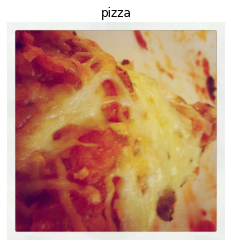

In [10]:
# View random image from the training data set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
img.dtype

dtype('uint8')

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[238, 243, 237],
        [239, 244, 238],
        [241, 246, 240],
        ...,
        [238, 245, 238],
        [238, 245, 238],
        [238, 245, 238]],

       [[238, 243, 237],
        [239, 244, 238],
        [240, 245, 239],
        ...,
        [238, 245, 238],
        [238, 245, 238],
        [238, 245, 238]],

       [[239, 244, 238],
        [239, 244, 238],
        [240, 245, 239],
        ...,
        [238, 245, 238],
        [238, 245, 238],
        [238, 245, 238]],

       ...,

       [[240, 240, 240],
        [240, 240, 240],
        [239, 239, 239],
        ...,
        [240, 242, 239],
        [240, 242, 239],
        [239, 241, 238]],

       [[240, 240, 240],
        [240, 240, 240],
        [239, 239, 239],
        ...,
        [239, 241, 238],
        [239, 241, 238],
        [239, 241, 238]],

       [[242, 242, 242],
        [241, 241, 241],
        [240, 240, 240],
        ...,
        [240, 242, 23

In [13]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [14]:
# Get all the pixels values between 0 & 1
img/255.

array([[[0.93333333, 0.95294118, 0.92941176],
        [0.9372549 , 0.95686275, 0.93333333],
        [0.94509804, 0.96470588, 0.94117647],
        ...,
        [0.93333333, 0.96078431, 0.93333333],
        [0.93333333, 0.96078431, 0.93333333],
        [0.93333333, 0.96078431, 0.93333333]],

       [[0.93333333, 0.95294118, 0.92941176],
        [0.9372549 , 0.95686275, 0.93333333],
        [0.94117647, 0.96078431, 0.9372549 ],
        ...,
        [0.93333333, 0.96078431, 0.93333333],
        [0.93333333, 0.96078431, 0.93333333],
        [0.93333333, 0.96078431, 0.93333333]],

       [[0.9372549 , 0.95686275, 0.93333333],
        [0.9372549 , 0.95686275, 0.93333333],
        [0.94117647, 0.96078431, 0.9372549 ],
        ...,
        [0.93333333, 0.96078431, 0.93333333],
        [0.93333333, 0.96078431, 0.93333333],
        [0.93333333, 0.96078431, 0.93333333]],

       ...,

       [[0.94117647, 0.94117647, 0.94117647],
        [0.94117647, 0.94117647, 0.94117647],
        [0.9372549 , 0

## An end-to-end example

Let's build a convolutional neural network to find pattern in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data ( get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 200ms/step - loss: 0.5645 - accuracy: 0.7007 - val_loss: 0.4615 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4247 - accuracy: 0.8073 - val_loss: 0.3290 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3975 - accuracy: 0.8213 - val_loss: 0.3132 - val_accuracy: 0.8920
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3568 - accuracy: 0.8480 - val_loss: 0.3473 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3390 - accuracy: 0.8573 - val_loss: 0.3384 - val_accuracy: 0.8460


In [16]:
len(train_data)

47

In [17]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

Let's replicate the model we build in previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playgrounds](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.58348&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create the model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
]) 

# Compile the model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 0.7667 - accuracy: 0.5153 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [19]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite of having 20x more parameters than our CNN (model_1), model_2 performs terribly...let's try to improve it.

In [20]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# COmpile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 2.5194 - accuracy: 0.6227 - val_loss: 1.1907 - val_accuracy: 0.6480
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 1.6260 - accuracy: 0.6847 - val_loss: 0.5629 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6094 - accuracy: 0.7540 - val_loss: 0.5313 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5657 - accuracy: 0.7613 - val_loss: 0.5368 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5557 - accuracy: 0.7700 - val_loss: 0.8517 - val_accuracy: 0.6600


In [21]:
# Get summary of model__3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:-** We can think of trainable parameters as **patterns a model can learn from data**. Intuitvely, we might think more is better. And in lots of cases, it is. But in this case. the difference here is the two different styles pf model we're using. Where a series of dense layers has a number of different learnable paramaeters connected to each other and hence a higher number of possible learnable patterns, **a CNN seeks to sort out and learn the most importnant in an image**. So even though there are a less learnable parameters in our CNN, there are often more helpful in dechiphering between different **features** in an image. 

## Binary classification: let's break it down

1. Become one with data
2. Preprocess the data.
3. Create the model.
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and improve the model.
7. Repeat until satisfy.

### 1. Become one with data

['2912290.jpg']
Image shape: (512, 512, 3)
['1670471.jpg']
Image shape: (384, 512, 3)


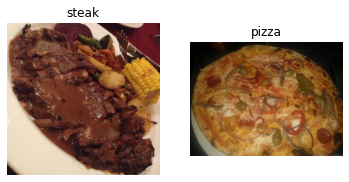

In [22]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data (prepare it for model)

In [23]:
# Define directory datasets paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10, 000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons.
1. 10,000 images (or more) moght not fit into the memory of your preocessor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well. 

In [24]:
# Create the train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [25]:
# Load in our imge data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images  
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of training data batch
images, labels = train_data.next() # get the "next" batch  of images
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
# Get the first tw images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (Start with the baseline).

A baseline is a relatively  simple model or existing result that you setup when beginning a machine learning experimenting, you tr to beat the baseline.

> **Note:-** In deep learning, there is almost an infinite amount of architectures we could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complecxity as required (e.g. look at which current model is performing best in the field for our system).

In [31]:
# Make a creating oof our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Activation, Conv2D
from tensorflow.keras import Sequential

In [32]:
# Create the model
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3, 3), # the size of the sliding window going across an input 
         strides=(1, 1), # the size of the step the sliding windoow takes across an input
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed 
         activation="relu", 
         input_shape=(224,224,3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [33]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [34]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [35]:
# Fit the model
history_4 = model_4.fit(train_data, # this ia a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 0.7359 - accuracy: 0.7293 - val_loss: 0.4414 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4002 - accuracy: 0.8273 - val_loss: 0.4379 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.2725 - accuracy: 0.9013 - val_loss: 0.4081 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.1150 - accuracy: 0.9693 - val_loss: 0.4148 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0418 - accuracy: 0.9913 - val_loss: 0.5260 - val_accuracy: 0.8000


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

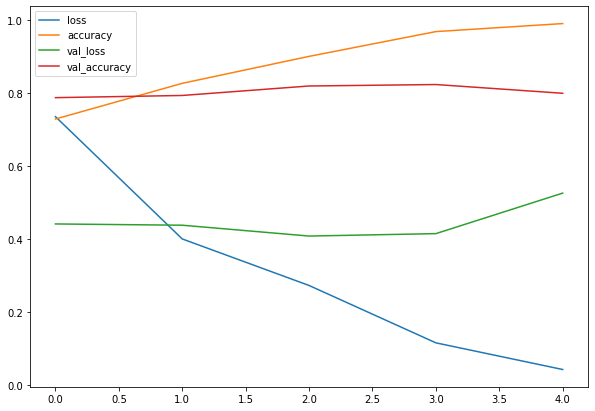

In [36]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [37]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs did we run?

  # Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, loss, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

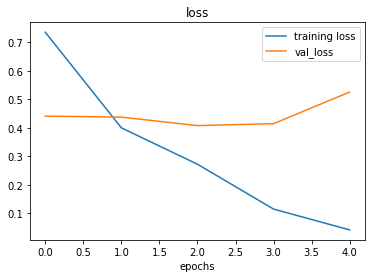

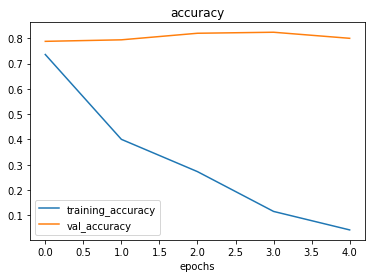

In [38]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers.
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer.

Reduce overfitting:
* Add data augmentation.
* Add regularization layers (such as MaxPool2D)
* Add more data...

> **Note:-** Reducing overfitting is also known as *Regularization*


In [39]:
# Create the model ( this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 0.5977 - accuracy: 0.6813 - val_loss: 0.4920 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4704 - accuracy: 0.7873 - val_loss: 0.3899 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4567 - accuracy: 0.7960 - val_loss: 0.3735 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4255 - accuracy: 0.8140 - val_loss: 0.3470 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4046 - accuracy: 0.8313 - val_loss: 0.3722 - val_accuracy: 0.8400


In [40]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

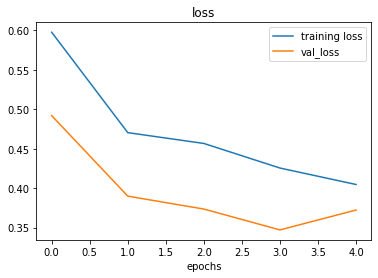

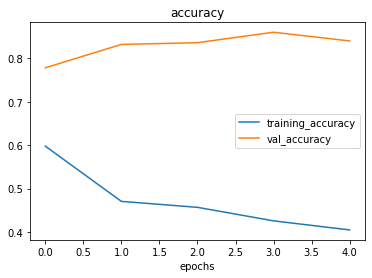

In [41]:
# Plot loss curves
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [42]:
# Create ImageDataGenerator training
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # Zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image?
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question**:- What is data augmentation?

It is a process of altering our training data, leding it to have more diversity and in turn allowing our model to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it, and something similar.

In [43]:
# import data and augment it from training directory
print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration propses only

# Create non-augmented train data batches
print("Non-Augmented Training Data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
IMG_SIZE = (224,224)
# Create non-augmented test data batches
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary")
                                               


Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data: 
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Note:-** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` build-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [44]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels arent augmented.....onlt data (images).

Showing image number: 8
Original Image


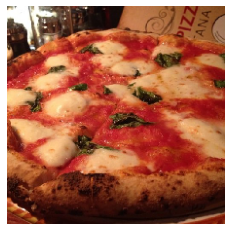

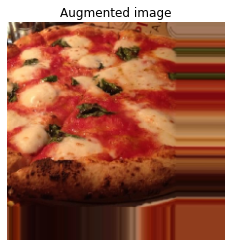

In [45]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31)  # our batch size is 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
print(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


In [46]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 427ms/step - loss: 0.7032 - accuracy: 0.4287 - val_loss: 0.6853 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 20s 425ms/step - loss: 0.6867 - accuracy: 0.5833 - val_loss: 0.6434 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 20s 427ms/step - loss: 0.6658 - accuracy: 0.6267 - val_loss: 0.5783 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 20s 426ms/step - loss: 0.6399 - accuracy: 0.6580 - val_loss: 0.5750 - val_accuracy: 0.6320
Epoch 5/5
47/47 [==============================] - 20s 423ms/step - loss: 0.6381 - accuracy: 0.6340 - val_loss: 0.5683 - val_accuracy: 0.7740


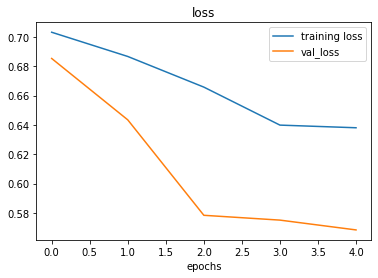

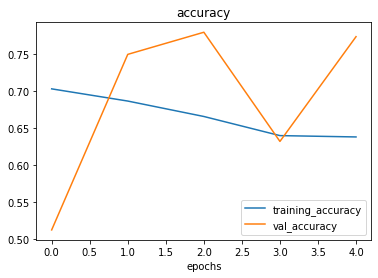

In [47]:
# Check our models training curves
plot_loss_curves(history_6)

In [48]:
# import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time 

Found 1500 images belonging to 2 classes.


In [49]:
# Create the model ( same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        )

Epoch 1/5
47/47 [==============================] - 21s 430ms/step - loss: 0.6521 - accuracy: 0.6140 - val_loss: 0.5452 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 20s 420ms/step - loss: 0.5062 - accuracy: 0.7540 - val_loss: 0.3676 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 20s 421ms/step - loss: 0.4852 - accuracy: 0.7727 - val_loss: 0.4265 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 20s 420ms/step - loss: 0.4844 - accuracy: 0.7747 - val_loss: 0.3290 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 20s 422ms/step - loss: 0.4527 - accuracy: 0.7933 - val_loss: 0.3309 - val_accuracy: 0.8560


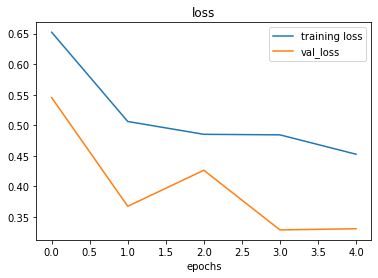

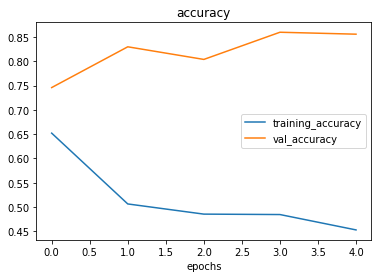

In [50]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:-** When shuffling data, the model get exposed to all the different kinds of data during training, thus enabling it to learn  features across a wide array of images (in our pizza & steak at the same time instead of just pizzza then steeak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64).
* Train for longer (more epochs).
* Find an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **Transfer Learning** to leverage what other image model has learn and adjust it for our own use case.

## Make a prediction with our trained model on our own custom data

In [51]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-06-12 15:48:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-06-12 15:48:17 (33.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



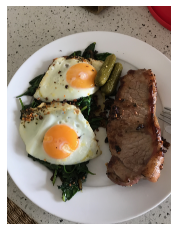

In [52]:
# View our example image
import  matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [54]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

**Note:-** When we train a neural network nd we want to make a prediction with it on our own custom data, it's important than our custom data (or new data) in preprocessed into the same format as the data our model was trained on.

In [55]:
# Create a function to import and image and resize it to be able to be use with our model
def load_and_pred_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into tensor and reshapes it to
  (img_shape, img_shape, colour_channels).
  """

  # Read in image 
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img/255.
  return img

In [56]:
# Load in and preprocess our custom image
steak = load_and_pred_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [57]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

In [58]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.86908704]], dtype=float32)

In [59]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [60]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and 
  plots the image with predicted class with title.
  """
  # import the target image and preprocess it
  img = load_and_pred_image(filename)
  
  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

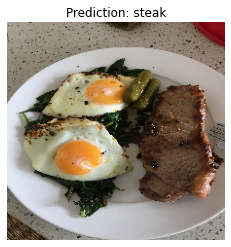

In [61]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2021-06-12 15:48:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-06-12 15:48:20 (35.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



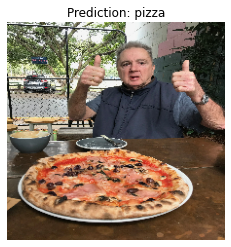

In [62]:
# Download another test custom image and make a prediction on it.
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class image classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of fool (multi-class image classification).
1. Become one with data
2. Preprocess the data (get it ready for a model).
3. Create a model (start with a baseline).
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model 
6. Adjust different hyperparamters and improve the model (try to beat the baseline/reduce overfitting).
7. Repeat until satisfied 

## 1. Import and become one wit data

In [63]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-06-12 15:48:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.135.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   228MB/s    in 2.2s    

2021-06-12 15:48:23 (228 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [64]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories {len(filenames)} images in '{dirpath}'.")

There are 2 directories 0 images in '10_food_classes_all_data'.
There are 10 directories 0 images in '10_food_classes_all_data/train'.
There are 0 directories 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories 750 images in '10_food_classes_all_data/train/hamburger'.
There are 10 directories 0 images in '10_food_c

In [65]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [66]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2986320.jpg']
Image shape: (512, 512, 3)


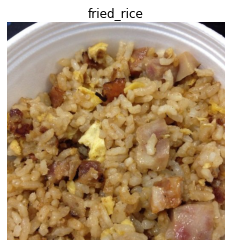

In [67]:
# Visualize, visualize, visuaize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) 

In [68]:
random.choice(class_names)

'grilled_salmon'

### 2. Preprocess the data (prepare it for a model)

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

                                   

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (very similar to previous models but actually the same as CNN explainer website )
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224,224,3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # changed to have 10 output neirons and use the softmax activation function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit the model

In [71]:
# Fit the model
history_8 = model_8.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 188ms/step - loss: 2.1763 - accuracy: 0.1881 - val_loss: 2.0524 - val_accuracy: 0.2492
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.9396 - accuracy: 0.3228 - val_loss: 1.8901 - val_accuracy: 0.3348
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 1.5594 - accuracy: 0.4773 - val_loss: 1.9565 - val_accuracy: 0.3384
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 0.9643 - accuracy: 0.6852 - val_loss: 2.4122 - val_accuracy: 0.2992
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.4230 - accuracy: 0.8685 - val_loss: 3.4748 - val_accuracy: 0.2660


### 4. Evaluate the model

In [74]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 3.4748 - accuracy: 0.2660


[3.4747867584228516, 0.26600000262260437]

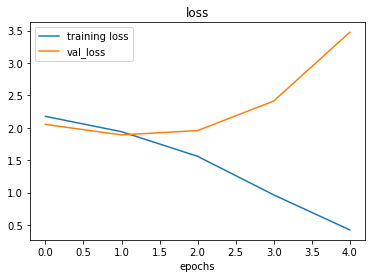

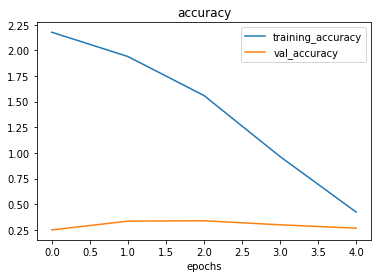

In [75]:
# Check out the models loss curves on the 10 classes
plot_loss_curves(history_8)

### 6. Adjust the odel hyperparameters (to beat the baseline/reducr overfitting)

Due to its performace n training data, it's clear our model is learninig something...

So lets try and fixx overfitting by:

* **Get more data**- having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model**- If our current model is overfiiting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers.
* **Use data augmentation** - data augmentation manipulates te taining data in uch a way to add more diversity to it(without alering original data).
* **Use Transfer Learning**- It leverages the patterns another models has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# How about we try an simplify the model first?
# Let's try to remove 2 convolutional layers....
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [83]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 175ms/step - loss: 2.4188 - accuracy: 0.2065 - val_loss: 1.9678 - val_accuracy: 0.2996
Epoch 2/5
235/235 [==============================] - 41s 173ms/step - loss: 1.8139 - accuracy: 0.3768 - val_loss: 1.8748 - val_accuracy: 0.3428
Epoch 3/5
235/235 [==============================] - 40s 172ms/step - loss: 1.4995 - accuracy: 0.5023 - val_loss: 1.9307 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 42s 179ms/step - loss: 1.1037 - accuracy: 0.6477 - val_loss: 2.1557 - val_accuracy: 0.3160
Epoch 5/5
235/235 [==============================] - 41s 175ms/step - loss: 0.7263 - accuracy: 0.7752 - val_loss: 2.4740 - val_accuracy: 0.3060


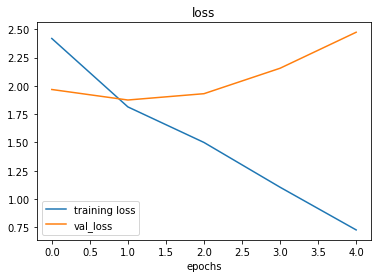

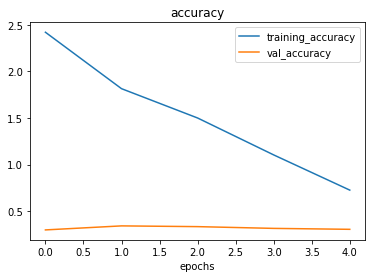

In [84]:
# Check out the loss curves of model_1
plot_loss_curves(history_9)

In [78]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)       

Looks like our "simplifying the model" experiment didn't work....the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves close).
* Improve validation accuracy.

In [85]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [86]:
# Let's create aanother model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [88]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 100s 424ms/step - loss: 2.2612 - accuracy: 0.1509 - val_loss: 2.2025 - val_accuracy: 0.1676
Epoch 2/5
235/235 [==============================] - 100s 424ms/step - loss: 2.1472 - accuracy: 0.2207 - val_loss: 2.0130 - val_accuracy: 0.2748
Epoch 3/5
235/235 [==============================] - 100s 424ms/step - loss: 2.0807 - accuracy: 0.2701 - val_loss: 1.9350 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 100s 427ms/step - loss: 2.0202 - accuracy: 0.2933 - val_loss: 1.8831 - val_accuracy: 0.3496
Epoch 5/5
235/235 [==============================] - 99s 423ms/step - loss: 1.9658 - accuracy: 0.3196 - val_loss: 1.8167 - val_accuracy: 0.3820


In [87]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)       

In [89]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 3.4748 - accuracy: 0.2660


[3.4747860431671143, 0.26600000262260437]

In [90]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.8167 - accuracy: 0.3820


[1.8166663646697998, 0.38199999928474426]

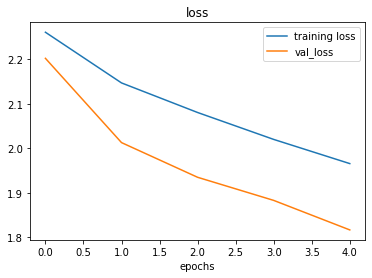

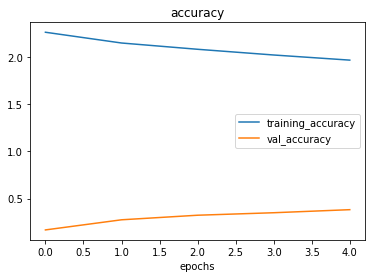

In [91]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

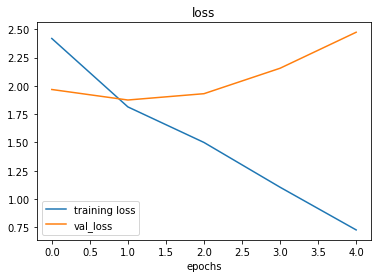

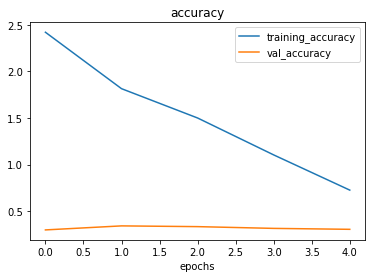

In [92]:
plot_loss_curves(history_9)

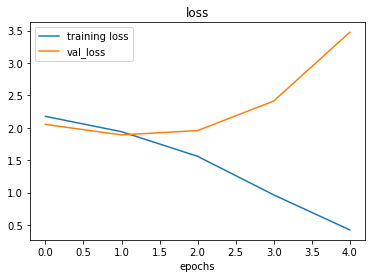

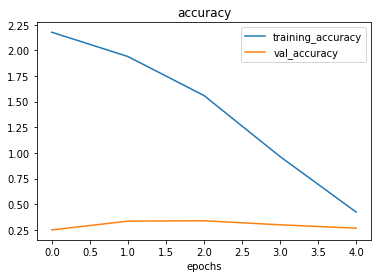

In [93]:
 plot_loss_curves(history_8)

That looks much better, the loss curves are much longer coser to each other than the baseline model they look like they're heading in the right direction (certainly not the wrong direction) so if were tarin for longer we might see for the further improvement.

### 7. Repeat until satisfied

We could keep going here....continally trying to bring our loss curve closer together and trying to improve the valiation/test accuracy.

How?

By running lots of experiments, namely:
- restructing our model's architecture (increasing layers/ hidden units).
- We could adjust learning rate
- we could try diffeent methods of data augmentation and huyperparamters in our ImageDataGenerator instance.
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **Transfer Learning**.



## Make a pediction woth our tarined model


In [94]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [95]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-06-12 17:30:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-06-12 17:30:58 (36.2 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2021-06-12 17:30:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [108]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and 
  plots the image with predicted class with title.
  """
  # import the target image and preprocess it
  img = load_and_pred_image(filename)
  
  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  print(len(pred[0]))
  print(tf.argmax(pred))
    
  # Add a logic for multi-class and pred class name
  if len(pred[0]) > 1:
    pred_class = class_names[int(tf.argmax(pred[0]))]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1
tf.Tensor([0], shape=(1,), dtype=int64)


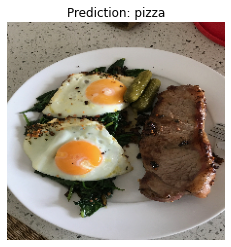

In [118]:
# Make a prediction using model_10
pred_and_plot(model=model_3,
              filename="03-steak.jpeg",
              class_names=["pizza", "steak"])

1
tf.Tensor([0], shape=(1,), dtype=int64)


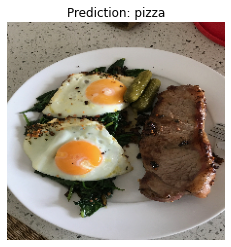

In [116]:
# Make a prediction using model_10
pred_and_plot(model=model_3,
              filename="03-steak.jpeg",
              class_names=["pizza", "steak"])

1
tf.Tensor([0], shape=(1,), dtype=int64)


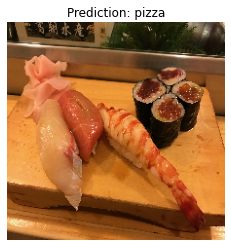

In [117]:
# Make a prediction using model_10
pred_and_plot(model=model_3,
              filename="03-sushi.jpeg",
              class_names=["pizza", "steak"])

10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


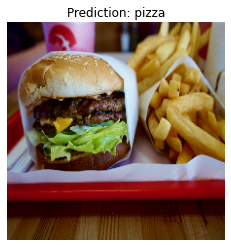

In [112]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=list(class_names))

### Saving and load our training model


In [119]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [121]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.8167 - accuracy: 0.3820


[1.816665768623352, 0.38199999928474426]

In [122]:
# Compare our model to or existing data
model_10.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.8167 - accuracy: 0.3820


[1.816665768623352, 0.38199999928474426]